In [2]:
import glob
import json
import pandas as pd
import numpy as np

In [3]:
json_files = glob.glob('json_dataset/*/*')
len(json_files)

22844

In [4]:
def key_dict2arr(key_dict: dict) -> np.ndarray:
    direction_dict = {(1, 0): 1, (0, 0): 0, (0, 1): -1, (1, 1): -1}
    movement_angle = np.arctan2(direction_dict[(key_dict['up'], key_dict['down'])],
                                direction_dict[(key_dict['right'], key_dict['left'])], dtype=np.float32)
    movement = (1 - 0.5 * key_dict['slow']) * \
               (key_dict['up'] or key_dict['down'] or key_dict['right'] or key_dict['left'])
#     output = np.array([np.sin(movement_angle), np.cos(movement_angle), movement], dtype=np.float32)
    output = np.array([movement_angle, movement], dtype=np.float32)
    return output

In [5]:
def json2key_dict(json_dir: str) -> dict:
    with open(json_dir, 'r') as f:
        key_dict = json.load(f)['key']
    return key_dict

In [6]:
data = np.stack(list(map((lambda j: key_dict2arr(json2key_dict(j))), json_files)))
pd.DataFrame(data).describe()

,0,1
count,22844.000000,22844.000000
mean,0.359556,0.266350
std,1.336128,0.266112
min,-2.356194,0.000000
25%,0.000000,0.000000
50%,0.000000,0.500000
75%,0.785398,0.500000
max,3.141593,1.000000


In [7]:
def pol2cart(phi, rho):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [8]:
data = np.stack(list(map(pol2cart, data[:, 0], data[:, 1])))
pd.DataFrame(data).describe()

,0,1
count,2.284400e+04,2.284400e+04
mean,-8.351274e-04,-3.255879e-03
std,2.705045e-01,2.618724e-01
min,-1.000000e+00,-1.000000e+00
25%,-2.185569e-08,-4.371139e-08
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

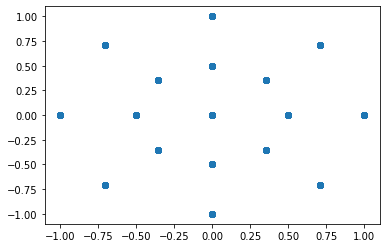

In [10]:
plt.scatter(data[:, 0], data[:, 1])

(array([   56.,     0.,    21.,  2633.,  1003.,     0.,     0., 15304.,
            0.,     0.,  1637.,  2049.,    73.,     0.,    68.]),
 array([-1.        , -0.8666667 , -0.73333335, -0.6       , -0.46666667,
        -0.33333334, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333334,  0.46666667,  0.6       ,  0.73333335,  0.8666667 ,
         1.        ], dtype=float32),
 <BarContainer object of 15 artists>)

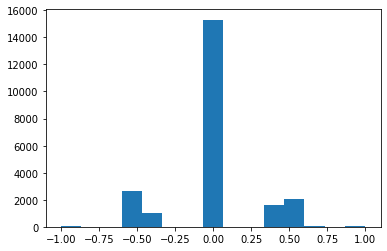

In [23]:
plt.hist(data[:, 0], bins=15)

(array([   60.,     0.,    37.,  1993.,  1576.,     0.,     0., 15873.,
            0.,     0.,  1064.,  2070.,    57.,     0.,   114.]),
 array([-1.        , -0.8666667 , -0.73333335, -0.6       , -0.46666667,
        -0.33333334, -0.2       , -0.06666667,  0.06666667,  0.2       ,
         0.33333334,  0.46666667,  0.6       ,  0.73333335,  0.8666667 ,
         1.        ], dtype=float32),
 <BarContainer object of 15 artists>)

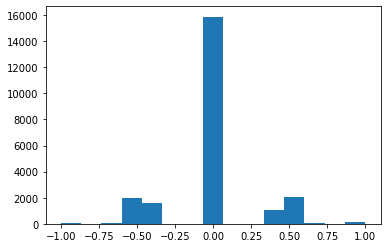

In [24]:
plt.hist(data[:, 1], bins=15)